Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your collaborators below:

In [65]:
COLLABORATORS = ""

---

In [66]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from bayesian_regression import print_equation
from ipywidgets import interact, IntSlider, FloatSlider

The priors used in Bayesian inference provide a method for controlling the flexibility of learning algorithms. In Problem Set 5, you looked at a crude way of controlling flexibility for polynomial regression: constraining the set of functions from which the algorithm was allowed to choose. In Bayesian inference, controls on flexibility are implemented through the choice of a prior over functions.

---
## Introduction

In this problem, the functions we'll be working with are the 10-th order polynomials:

$$
g(x) = \theta_{10} x^{10} + \ldots + \theta_{1} x + \theta_0
$$

These functions are entirely characterized by the coefficients $\theta = (\theta_{0}, \ldots, \theta_{10})$. We can define a prior over these functions by defining a distribution over $\theta$. We will be assuming that each $\theta_j$ follows a Gaussian (i.e. normal) distribution, so

$$
p(\theta_j) = \frac{1}{\sqrt{2\pi\sigma_j^2}} \exp\left(\frac{-\theta_j^2}{2\sigma_j^2}\right)
$$

where $\sigma_j = \alpha\beta^j$ (and $0 < \beta \leq 1$), and that the $\theta_j$ are independent, so $p(\theta) = \prod_{j=0}^{10} p(\theta_j)$.

The function `sample_theta` samples a vector $\theta$ from prior distribution defined above, given values of $\alpha$, $\beta$, and $k$ (which we will always just use at its default value, $k=10$):

In [67]:
def sample_theta(alpha, beta, k=10):
    """Sample a θ vector with degree k.
    
    Parameters
    ----------
    alpha, beta : float
        Parameters that define sigma_j
    k : int (default=10)
        The order of the polynomial to sample
        
    Returns
    -------
    numpy array with shape (k+1,) where the first element corresponds 
    to the highest order term (x^k) and the (k+1)^th element corresponds
    to the lowest order term (the constant).
    
    """
    theta = np.empty(k + 1)
    for j in range(k + 1):
        sigma_j = alpha * beta ** j
        theta[k - j] = np.random.normal(0, sigma_j)
    return theta

Calling `sample_theta` produces the $\theta$ vector, where the first value in the vector corresponds to $\theta_0$, and the last corresponds to $\theta_{10}$. To help you better visualize what the $\theta$ vector represents, we've provided you with a helper function, `print_equation`, that takes as input the $\theta$ vector and displays a properly formatted LaTeX equation.

So, we can first sample a value for $\theta$, and then display what the corresponding equation is:

In [68]:
theta = sample_theta(alpha=5, beta=0.5)

print("theta: {}".format(theta))
print_equation(theta)

theta: [-0.00521762  0.00605717  0.00546104  0.07430875 -0.06617314 -0.00568477
  0.17123248 -0.42888476  1.76508038  0.17200368  2.94020297]


Notice that as you run the above cell multiple times, the coefficients for $x^{10}$ and $x^9$ are frequently very close to zero. If this happens, then the polynomial is effectively a 8th or 9th order polynomial rather than a 10th order polynomial!

---
## Part A (1.5 points)

<div class="alert alert-success">
Having the LaTeX rendering of our equation is nice, but it would be even nicer if we could see the line that that equation corresponds to on a graph. Complete the function `sample_theta_and_plot` to sample a value for $\theta$ and then the corresponding function $g(x)$ for a range of $x$ values (see docstring for details).
</div>

In [69]:
def sample_theta_and_plot(axis, alpha, beta):
    """Samples a value for θ given α and β (and k=10),
    and plots the corresponding polynomial. Your plot should:
    
    * use an array of 150 values spaced evenly between -1 and 1 
      (including -1 and 1) as the x-coordinate values (hint: you
      may find the np.linspace function useful here)
    * have a single line, plotted in green, with a line width of 2
    * return the value of theta that you sampled
    
    Hint: remember that you can use the np.polyval function to
    compute y from x and the coefficients.
    
    Your answer can be done in 5 lines of code, including the
    return statement.
    
    Parameters
    ----------
    axis : matplotlib axis object
        The axis on which to plot the sampled line
    alpha, beta : float
        Parameters to pass to the `sample_theta` function
        
    Returns
    -------
    the sampled value of theta
    
    """
    # YOUR CODE HERE
    theta = sample_theta(alpha, beta)
    x = np.linspace(-1, 1, num=150)
    poly = np.polyval(theta,x)
    axis.plot(x, poly, color = 'g', linewidth=2)
    return theta

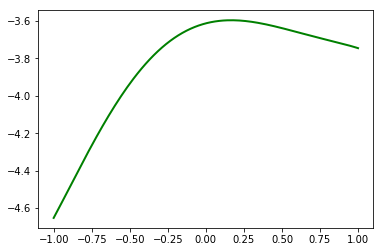

In [70]:
fig, axis = plt.subplots()
theta = sample_theta_and_plot(axis, 5, 0.5)
print_equation(theta)

In [71]:
"""Check that sample_theta_and_plot is correct."""
from numpy.testing import assert_array_equal, assert_allclose
from plotchecker import get_data
from nose.tools import assert_equal

# set the random seed and check that `sample_theta` is called correctly
np.random.seed(10)
fig, ax = plt.subplots()
expected1 = np.array([
     2.114386e-03,  -1.705080e-03,   8.381701e-05,   4.240177e-03,
     2.074309e-02,  -1.125134e-01,   1.941675e-01,  -5.239906e-03,
    -1.931750e+00,   1.788197e+00,   6.657933e+00])
assert_allclose(sample_theta_and_plot(ax, 5, 0.5), expected1, rtol=1e-6)
plt.close()
fig, ax = plt.subplots()
expected2 = np.array([
    -2.058888e-05,  -7.785525e-05,  -1.416920e-04,   6.493365e-04,
     1.970296e-04,  -5.523887e-03,   7.211229e-03,   1.234603e-02,
     1.850893e-01,  -5.790394e-01,   2.406075e+00])
assert_allclose(sample_theta_and_plot(ax, 2, 0.3), expected2, rtol=1e-6)
plt.close()

# check that the x and y values are plotted correctly
fig, ax = plt.subplots()
theta = sample_theta_and_plot(ax, 5, 0.5)
assert_array_equal(get_data(ax)[:, 0], np.linspace(-1, 1, 150))
assert_allclose(get_data(ax)[:, 1], np.polyval(theta, np.linspace(-1, 1, 150)))

# check linestyle and color
assert ax.lines[0].get_color() in ('g', 'green', '#008000', '#008')
assert_equal(ax.lines[0].get_linestyle(), '-')

plt.close()

print("Success!")

Success!


Now that you've implemented a function to sample different coefficients and plot the resulting line, we can plug your function into an IPython widget to help us more easily visualize what happens when we change the parameter values of $\alpha$, $\beta$, and $k$:

In [72]:
alpha_slider = FloatSlider(min=0.1, max=1, step=0.1, value=0.5)
beta_slider = FloatSlider(min=0, max=1, step=0.01, value=0)

@interact
def prior_samples(alpha=alpha_slider, beta=beta_slider):
    # beta is strictly greater than 0, so just make it small
    if beta == 0:
        beta = 0.001

    fig, axis = plt.subplots()
    for i in range(20):
        sample_theta_and_plot(axis, alpha, beta)
    axis.set_xlim(-1, 1)
    axis.set_ylim(-1, 1)
    axis.set_title(r"$\alpha={}$, $\beta={}$".format(alpha, beta), fontsize=20)

interactive(children=(FloatSlider(value=0.5, description='alpha', max=1.0, min=0.1), FloatSlider(value=0.0, de…

<div class="alert alert-success">
Try changing the sliders for $\alpha$ and $\beta$ to see what kinds of functions get sampled. How does changing $\alpha$ affect what functions are sampled from the prior?
</div>

When you change $\alpha$, the variance of each of thetas all change at an equal level and you essentially change the scaling of each graph in the y-axis. So when you increase $\alpha$, the scaling becomes increased, and when you decrease $\alpha$ the scaling decreases.

<div class="alert alert-success">
How does changing $\beta$ affect what functions are sampled from the prior? Explain *why* this happens in terms of how the value of $\beta$ affects $\sigma_j$ and the $\theta$ coefficients.
</div>

When you increase $\beta$, this corresponds to a higher variance for $\theta_j$, so when we are are sampling from a Gaussian distribution the theta value increases for every $\theta_j$, thereby making the function more curved. Since $\sigma_j$ = $\alpha$ * $\beta$, and $\beta$ determines the variance of the gaussian you are choosing from, more variance corresponds to more curvy lines. Changing the betas means that all the $\theta$ coefficients are being changed at different rate, which then changes the curvature of the graph. So increasing the beta corresponds to more curvature, and decreasing beta corresponds to a flatter line. 

---
## Part B (1 point)

Our data, $d$, will be vectors ${\bf x} = (x_1, x_2, \ldots, x_n)$ and ${\bf y} = (y_1, y_2, \ldots, y_n)$. We will use a Gaussian likelihood, assuming that the probability of a value of $\mathbf{y}$ decreases exponentially as the squared distance between $y_i$ and $g_{\theta}(x_i)$ increases,

$$
p(y_i\ |\ x_i,\theta) = \frac{1}{\sqrt{2\pi}\sigma_Y} \exp\left(\frac{-(y_i-g_{\theta}(x_i))^2}{2\sigma_Y^2}\right)
$$

where $\sigma_Y$ encodes how much we expect $y_i$ to vary from $g(x_i)$. Assuming that the $y_i$ are independent conditioned on $x_i$ and $\theta$, we have

$$
p(d\ |\ \theta) = \left ( \frac{1}{\sqrt{2\pi}\sigma_Y} \right )^n \exp\left(\frac{-\sum_{i=1}^n (y_i-g_{\theta}(x_i))^2}{2\sigma_Y^2}\right)
$$

as our likelihood.

We will be choosing $\theta$ by maximum *a posteriori* (MAP) estimation, taking the value that maximizes $p(\theta\ | \ d)$. Since $p(\theta\ |\ d)$ is proportional to $p(d\ |\ \theta)p(\theta)$ (by Bayes' rule), we want the function that maximizes $p(d\ |\ \theta)p(\theta)$. Rather than maximizing this quantity directly, we will instead try to maximize the *log*, i.e.:

$$
\theta_{MAP}=\arg\max_\theta \left[\log p(d\ |\ \theta) + \log p(\theta)\right]
$$

From our choice of likelihood, this becomes:

$$
\theta_{MAP}=\arg\max_\theta \left[\frac{-1}{2\sigma_Y^2} \left(\sum_{i=1}^n (y_i - g_{\theta}(x_i))^2\right) + \log p(\theta) + c\right]
$$

where $c$ is a constant determined by $\sigma_Y$. The first term is just the MSE on the training data multiplied by $-1/(2\sigma_Y^2)$. A function with a high MSE on the training data can still have high posterior probability, if its prior probability is sufficiently high. The MAP estimate will thus be a function that compromises between fitting the training data well and having high prior probability.

We have provided a function `bayes_polyfit` that finds the MAP estimate $\theta_{MAP}$, when supplied with $\mathbf{x}$, $\mathbf{y}$, $k$, $\sigma_Y$, $\alpha$, and $\beta$:

In [73]:
def bayes_polyfit(x, y, sigma_y, alpha, beta, k=10):
    """Finds the MAP estimate of θ assuming that both the likelihood
    and prior distributions are normally distributed as follows:
    
    p(y | x, θ) = N(g_θ(x), σ_y)
    p(θ_j) = N(0, αβ^j)
    
    Parameters
    ----------
    x, y : numpy arrays with shape (n,)
        The x and y values to fit to
    sigma_y : float
        The standard deviation of the likelihood
    alpha, beta : float
        Parameters that define the standard deviation of the prior
    k : int (default=10)
        The order of the polynomial to fit
        
    Returns
    -------
    numpy array with shape (k+1,) where the first element corresponds 
    to the constant term and the (k+1)^th element corresponds to the 
    coefficient for x^k.

    """
    # compute a matrix of x^j
    X = np.empty((x.size, k + 1))
    for j in range(k + 1):
        X[:, j] = x ** j

    # compute a diagonal matrix of sigma_j
    Sigma_j = np.diag([alpha * beta ** j for j in range(k + 1)])
    Sigma_j_inv = np.linalg.inv(Sigma_j)
        
    # compute the posterior variance, which is Σ_post = (X'X + σ_y^2·(Σ_j)^-1)^-1
    variance = np.linalg.inv(np.dot(X.T, X) + sigma_y**2 * Sigma_j_inv)
    
    # compute the posterior mean (which is the same as θ_MAP), which is Σ_post·X'·y
    theta_map = np.dot(variance, np.dot(X.T, y))

    return theta_map[::-1]

Using the function `bayes_polyfit`, we can compute $\theta_{MAP}$ for any given set of data (as well as parameters $\alpha$ and $\beta$). We can use the same data that we did in Problem Set 5:

In [74]:
data = np.load("data/xy_data.npy")
data[:10]

array([[ 0.05326841,  0.11153722],
       [ 0.09595921,  0.08886825],
       [ 0.33218686,  0.04323005],
       [ 0.36718942,  0.05728251],
       [ 0.52694255,  0.03424077],
       [ 0.56136812,  0.05958364],
       [ 0.71448407,  0.13404962],
       [ 0.69834226,  0.10344032],
       [ 0.96030273,  0.19107459],
       [ 0.88821028,  0.1567958 ]])

For example, to fit the first 10 datapoints using `bayes_polyfit`, with $\sigma_Y=0.05$, $\alpha=5$, and $\beta=0.5$:

In [75]:
theta = bayes_polyfit(data[:10, 0], data[:10, 1], sigma_y=0.05, alpha=5, beta=0.5)
print_equation(theta)

<div class="alert alert-success">
As before, it would be nice to actually plot this function to visualize it. Additionally, it would be nice to see the points that we were actually fitting to. Complete the function `plot_bayes_polyfit` to compute $\theta_{MAP}$ using `bayes_polyfit` and then plot the corresponding function along with the given $\mathbf{x}$ and $\mathbf{y}$ points.
</div>

In [76]:
def plot_bayes_polyfit(axis, x, y, sigma_y, alpha, beta):
    """Computes θ_MAP given x, y, α and β (and k=10), and plots both
    x and y as well as the corresponding polynomial. Your plot should:
    
    * have a line, plotted in blue, corresponding to the fitted 
      polynomial
    * use an array of 100 values spaced evenly between -0.2 and 1.2
      (including -0.2 and 1.2) as the x-coordinate values for the line
    * have black points corresponding to the x and y data
    * return the value of theta that you computed
    
    Your answer can be done in 6 lines of code, including the return
    statement.
    
    Parameters
    ----------
    axis : matplotlib axis object
        The axis on which to plot the sampled line
    x, y : numpy arrays with shape (n,)
        The x and y values to fit to
    sigma_y : float
        The standard deviation of the likelihood
    alpha, beta : float
        Parameters that define the standard deviation of the prior
        
    Returns
    -------
    the computed value of θ_MAP
    
    """
    # YOUR CODE HERE
    x_poly = np.linspace(-0.2, 1.2, 100)
    theta = bayes_polyfit(x, y, sigma_y, alpha, beta, k=10)
    poly = np.polyval(theta,x_poly)
    axis.plot(x_poly, poly, color = 'blue')
    axis.plot(x,y, "ko")
    return theta

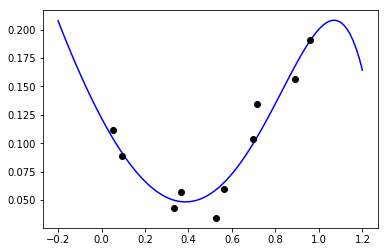

In [77]:
# load the data
data = np.load("data/xy_data.npy")

# plot it
fig, axis = plt.subplots()
theta = plot_bayes_polyfit(axis, data[:10, 0], data[:10, 1], sigma_y=0.05, alpha=5, beta=0.5)
print_equation(theta)

In [78]:
"""Check that plot_bayes_polyfit is correct."""
from numpy.testing import assert_array_equal, assert_allclose
from plotchecker import get_data
from nose.tools import assert_equal

# check that `plot_bayes_polyfit` is called correctly
fig, axis = plt.subplots()
expected1 = np.array([
   -0.00337945, -0.0067104 , -0.0126453 , -0.02192577, -0.03267307,
   -0.03356233,  0.01007254,  0.16191439,  0.37717652, -0.35995902,
    0.12198659])
actual1 = plot_bayes_polyfit(axis, data[:10, 0], data[:10, 1], sigma_y=0.05, alpha=5, beta=0.5)
assert_allclose(actual1, expected1, rtol=1e-6)
plt.close()
fig, axis = plt.subplots()
expected2 = np.array([
    0.59930636,  0.18540162, -0.24609423, -0.56185745, -0.58111726,
   -0.17484288,  0.4949956 ,  0.73813432,  0.01918733, -0.3841807 ,
    0.13539476])
actual2 = plot_bayes_polyfit(axis, data[:20, 0], data[:20, 1], sigma_y=0.01, alpha=3, beta=0.8)
assert_allclose(actual2, expected2, rtol=1e-6)
plt.close()

fig, axis = plt.subplots()
theta = plot_bayes_polyfit(axis, data[:10, 0], data[:10, 1], sigma_y=0.05, alpha=5, beta=0.5)

# make sure there are exactly two lines (the blue line and the black points)
assert_equal(len(axis.lines), 2)
if axis.lines[0].get_xydata().shape == (100, 2):
    blue_line = axis.lines[0]
    black_points = axis.lines[1]
else:
    blue_line = axis.lines[1]
    black_points = axis.lines[0]

assert_array_equal(blue_line.get_xydata()[:, 0], np.linspace(-.2, 1.2, 100))
assert_array_equal(black_points.get_xydata()[:, 0], data[:10, 0])
assert_allclose(blue_line.get_xydata()[:, 1], np.polyval(theta, np.linspace(-.2, 1.2, 100)))
assert_allclose(black_points.get_xydata()[:, 1], data[:10, 1])

# check linestyle and color
assert blue_line.get_color() in ('b', 'blue', '#0000FF', '#00F', (0.0, 0.0, 1.0))
assert black_points.get_color() in ('k', 'black', '#000000', '#000', (0.0, 0.0, 0.0))
assert_equal(blue_line.get_linestyle(), '-')
assert_equal(black_points.get_linestyle(), 'None')
assert_equal(black_points.get_marker(), 'o')

plt.close()

print("Success!")

Success!


Once your implementation of `plot_bayes_polyfit` is complete, we can plug it into another IPython widget in order to visualize the effect of changing $\sigma_Y$, $\alpha$, and $\beta$ on the MAP estimate of $\theta$:

In [79]:
data = np.load("data/xy_data.npy")

sigma_y_slider = FloatSlider(min=0.0, max=1, step=0.01, value=0.05)
alpha_slider = FloatSlider(min=0.1, max=1, step=0.1, value=0.5)
beta_slider = FloatSlider(min=0, max=1, step=0.01, value=0)

@interact
def visualize_plot_bayes_polyfit(sigma_y=sigma_y_slider, alpha=alpha_slider, beta=beta_slider):
    # sigma_y is strictly greater than 0, so just make it small
    if sigma_y == 0:
        sigma_y = 0.001
    # beta is strictly greater than 0, so just make it small
    if beta == 0:
        beta = 0.001

    fig, axis = plt.subplots()
    plot_bayes_polyfit(axis, data[:10, 0], data[:10, 1], sigma_y, alpha, beta)
    axis.set_ylim(0, 0.25)
    axis.set_title(r"$\sigma_Y={}$, $\alpha={}$, $\beta={}$".format(sigma_y, alpha, beta), fontsize=20)

interactive(children=(FloatSlider(value=0.05, description='sigma_y', max=1.0, step=0.01), FloatSlider(value=0.…

<div class="alert alert-success">Try moving the sliders to change the values of $\sigma_Y$, $\alpha$, and $\beta$. What effect does the value of $\sigma_Y$ have on on the functions found by this MAP procedure?</div>

We know that $\sigma_Y$ is correlated to the expected standard deviation between the expected values from the gaussian and the y values if the function. So increasing $\sigma_Y$ makes the function have a higher bias and therefore not fit the data points too well. On the other hand, decreasing $\sigma_Y$ affects the function in that it minimizes distance between the function itself and the datapoints.

<div class="alert alert-success">
What is the effect of the prior term on the functions found by this MAP procedure?
</div>

The effect on the prior term on the functions found by this MAP procedure are just slightly different. The $\alpha$ values still correspond to the scaling of the y values by a constant. The difference is that $\beta$ only adds curvature to the higher numbers in the function because it is only increasing the variance of the high-order polynomial $\theta$ coefficients.

---
## Part C (1 point)

Even though we've now defined a way to compute estimates of $\theta_{MAP}$, we still want to know whether that estimate is actually any good or not. How well does it generalize to other data? We can try to answer this question by training on one set of data, and then computing the mean squared error on a different set of data. 

<div class="alert alert-success">
Complete the function `mse` to compute $\theta_{MAP}$ for the training data, and then to return the mean squared error (MSE) for both the training and testing data. This function should be very similar to the MSE function you wrote in Problem Set 5.
</div>

<div class="alert alert-warning">
Note: Your function should call `bayes_polyfit` EXACTLY once. You should not be calling it twice!
</div>

In [80]:
def mse(train, test, sigma_y, alpha, beta):
    """Fits a polynomial to a training dataset using MAP estimation, and 
    then returns the mean squared error (MSE) between the y-values
    of the training data and the fitted polynomial, and the MSE
    between the y-values of the test data and the fitted polynomial.
    
    Your answer can be done in 6 lines of code, including the return
    statement.
    
    Parameters
    ----------
    train : numpy array with shape (n, 2)
        The training data, where the first column corresponds to the
        x-values, and the second column corresponds to the y-values
    test : numpy array with shape (m, 2)
        The testing data, where the first column corresponds to the
        x-values, and the second column corresponds to the y-values
    sigma_y : float
        The standard deviation of the likelihood
    alpha, beta : float
        Parameters that define the standard deviation of the prior
        
    Returns
    -------
    a 2-tuple consisting of the training set MSE and testing set MSE
    
    """
    # YOUR CODE HERE
    train_list = []
    test_list = []
    n = 0
    j = 0
    p = bayes_polyfit(train[:, 0], train[:, 1], sigma_y, alpha, beta)
    train_g = np.polyval(p, train[:, 0])
    test_g = np.polyval(p, test[:, 0])
    for i in train:
        train_list.append((i[1] - train_g[n])**2)
        n = n+1
    for i in test:
        test_list.append((i[1] - test_g[j])**2)
        j = j+1
    test_list = (1/len(test_g)) * np.sum(test_list)
    train_list = (1/len(train_g)) * np.sum(train_list)
    return (train_list, test_list)

For example, we can compute the MSE for $\sigma_Y=0.05$, $\alpha=5$, and $\beta=0.5$ as follows:

In [81]:
# load the data
data = np.load("data/xy_data.npy")

# compute the MSE
train_mse, test_mse = mse(data[:10], data[10:], 0.05, 5, 0.5)
print("The training error is: " + str(train_mse))
print("The testing error is:  " + str(test_mse))

The training error is: 0.000179231192449
The testing error is:  0.000422293207446


In [82]:
# add your own test cases here


In [83]:
"""Test that the `mse` function is correct."""
from numpy.testing import assert_allclose

data = np.load("data/xy_data.npy")

# use first ten, and the remaining
assert_allclose(mse(data[:10], data[10:], 0.05, 5, 0.5), (0.00017923119244892278, 0.00042229320744594277))
assert_allclose(mse(data[:10], data[10:], 0.01, 3, 0.8), (0.00013236899868029913, 0.00048738313668677277))
assert_allclose(mse(data[:10], data[10:], 0.02, 4, 0.4), (0.00016345646919385944, 0.00044807927181970573))

# use half-and-half
assert_allclose(mse(data[:55], data[55:], 0.05, 5, 0.5), (0.00034014346736179748, 0.00039665479872906133))
assert_allclose(mse(data[:55], data[55:], 0.01, 3, 0.8), (0.00033488020345527299, 0.00041108744745287085))
assert_allclose(mse(data[:55], data[55:], 0.02, 4, 0.4), (0.00033859355834118019, 0.00039868682354987449))

# use last twenty, and the remaining
assert_allclose(mse(data[-20:], data[:-20], 0.05, 5, 0.5), (0.00022355555903380491, 0.00053064829628726782))
assert_allclose(mse(data[-20:], data[:-20], 0.01, 3, 0.8), (0.00019604154213550924, 0.00055087407914624611))
assert_allclose(mse(data[-20:], data[:-20], 0.02, 4, 0.4), (0.00022166576215126383, 0.00053418258236528535))

print("Success!")

Success!


In [84]:
def plot_mse(axis, train, test, sigma_y=0.05, alpha=5):
    """Plot the mean squared error (MSE) for the given training and testing
    data as a function of beta.
    
    * Your plot should show the MSE for 150 values of beta evenly spaced
      between 0.001 and 1 (including 0.001 and 1)
    * There should be two lines: one blue, for the training set error, and
      one red, for the testing set error.
    * Make sure to include labels for the x- and y- axes.
    * Label the training error and testing error lines as "Training set error" 
      and "Testing set error", respectively. These labels will be used to
      create a legend later on (and so you should NOT actually create the
      legend yourself -- just label the lines). See the documentation for
      `axis.plot` to see how to assign a label to a line.
      
    Your answer can be done in 9 lines of code, including the return statement.
      
    Parameters
    ----------
    axis : matplotlib axis object
        The axis on which to plot the MSE
    train : numpy array with shape (n, 2)
        The training data, where the first column corresponds to the
        x-values, and the second column corresponds to the y-values
    test : numpy array with shape (m, 2)
        The testing data, where the first column corresponds to the
        x-values, and the second column corresponds to the y-values
    sigma_y : float
        The standard deviation of the likelihood
    alpha : float
        Parameter that partially defines| the standard deviation of the prior
        
    Returns
    -------
    numpy array with shape (150, 2)
        The MSE for the training data (corresponding to the first column) and
        for the testing data (corresponding to the second column). Each row
        corresponds to a different value of beta.

    """
    # YOUR CODE HERE
    #set labels
    axis.set_xlabel("Beta")
    axis.set_ylabel("Mean Squared Error")
    axis.set_title("Plot MSE")
    x = np.linspace(0.001, 1, 150)
    axis.plot(x, [mse(train, test, sigma_y, alpha, b)[0] for b in x], color="blue", label = "Training set error")
    axis.plot(x, [mse(train, test, sigma_y, alpha, b)[1] for b in x], color="red", label = "Testing set error")
    mse_arr = np.empty((len(x), 2))
    n = 0
    for b in x:
        mse_arr[n][0] = mse(train, test, sigma_y, alpha, b)[0]
        mse_arr[n][1] = mse(train, test, sigma_y, alpha, b)[1]
        n = n+1
    return mse_arr

After implementing the `plot_mse` function, you should be able to see the error as a function of $\beta$ for both the training set and the test set:

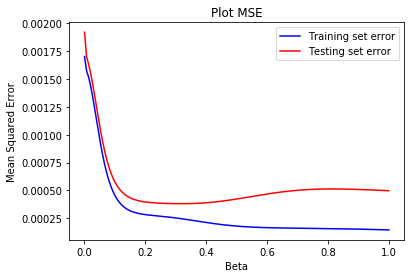

In [85]:
# load the data
data = np.load("data/xy_data.npy")

# plot it
fig, axis = plt.subplots()
plot_mse(axis, data[:10], data[10:])
axis.legend(loc='upper right')

In [86]:
"""Is the plot_mse function correctly implemented?"""
from nose.tools import assert_equal, assert_not_equal
from numpy.testing import assert_allclose
from plotchecker import get_data

data = np.load("data/xy_data.npy")

# check that it uses the mse function
old_mse = mse
del mse
try:
    fig, axis = plt.subplots()
    plot_mse(axis, data[:10], data[10:])
except NameError:
    pass
else:
    raise AssertionError("plot_mse should call mse, but it does not")
finally:
    plt.close('all')
    mse = old_mse
    del old_mse
    
fig, axis = plt.subplots()
error = plot_mse(axis, data[:10], data[10:])
axis.legend(loc='upper left')

# check the error
assert_equal(error.shape, (150, 2))
xvals = np.linspace(0.001, 1, 150)
assert_allclose(error[0], mse(data[:10], data[10:], 0.05, 5, xvals[0]))
assert_allclose(error[4], mse(data[:10], data[10:], 0.05, 5, xvals[4]))
assert_allclose(error[8], mse(data[:10], data[10:], 0.05, 5, xvals[8]))
assert_allclose(error[90], mse(data[:10], data[10:], 0.05, 5, xvals[90]))
assert_allclose(error[99], mse(data[:10], data[10:], 0.05, 5, xvals[99]))

# check that there are two lines
assert_equal(len(axis.lines), 2)
if axis.lines[0].get_color() in ('b', 'blue', '#0000FF', '#00f', (0.0, 0.0, 255.0)):
    train_line = axis.lines[0]
    test_line = axis.lines[1]
else:
    train_line = axis.lines[1]
    test_line = axis.lines[0]

# check the plotted data
assert_allclose(train_line.get_xydata()[:, 0], np.linspace(0.001, 1, 150))
assert_allclose(test_line.get_xydata()[:, 0], np.linspace(0.001, 1, 150))
assert_allclose(train_line.get_xydata()[:, 1], error[:, 0])
assert_allclose(test_line.get_xydata()[:, 1], error[:, 1])

# check the line colors
assert train_line.get_color() in ['b', 'blue', (0.0, 0.0, 255.0), '#0000FF', '#00f']
assert test_line.get_color() in ['r', 'red', (1, 0, 0), '#FF0000']

# check the legend
legend_labels = [x.get_text() for x in axis.get_legend().get_texts()]
assert_equal(legend_labels, ["Training set error", "Testing set error"])

# check the axis labels
assert_not_equal(axis.get_xlabel(), "")
assert_not_equal(axis.get_ylabel(), "")

plt.close('all')

print("Success!")

Success!


---
## Part D (1 point)

Now, we will use another IPython widget to visualize how the error changes depending on the dataset that we are fitting to. The widget will call your `plot_mse` function with different subsets of the data, depending on the index that is set:

In [87]:
# load the data
data = np.load("data/xy_data.npy")

@interact
def make_polynomial_fit_and_graph(training_set_index=(1, 11)):
    # relabel the index for convenience
    i = training_set_index
    
    # pull out the training and testing data
    traindata = data[((i - 1) * 10):(i * 10)]
    testdata = np.concatenate([data[:((i - 1) * 10)], data[(i * 10):]])

    # plot the MSE
    fig, axis = plt.subplots()
    plot_mse(axis, traindata, testdata, 0.05, 5)
    axis.set_ylim(0, 0.003)
    axis.set_title("MSE for dataset #{}".format(i))
    axis.legend(loc='upper right')

interactive(children=(IntSlider(value=6, description='training_set_index', max=11, min=1), Output()), _dom_cla…

The MSE on the test set is an approximation to the generalization error produced by a learning algorithm. In class, we discussed how the generalization error of a learning algorithm is affected by both its bias and its variance. Both the bias and the variance depend upon the true function that is being estimated. An algorithm with high bias will systematically produce predictions that differ from the true function.  An algorithm with high variance will produce predictions that can deviate wildly depending on the specifics of the dataset.

<div class="alert alert-success">Suggest how the results from the MSE on the test set could be explained in terms of the bias and variance of the learning algorithms that result from using different priors over functions.</div>

As we can see in the different datasets for the testing set the variance is very high for low beta values because the algorithm can start learning the data in many ways, thus causing a high MSE in the beginning. When the beta value starts increasing, the MSE decreases and we see here the balance of bias and variance of the algorithm. After this point, increasing the beta more causes the algorithm to become more biased and then we see an increase in the MSE because it is essentially underfitting the data.

---
## Part E (0.5 points)

<div class="alert alert-success">The 10th-order polynomials are a very flexible class of functions.  Why were we sometimes able to get away with using a learning algorithm that can choose from such a large set of functions without suffering from overfitting?</div>

The reason that the 10th order polynomial was successful without overfitting was because we had control over the priors alpha, beta, and theta values. This made it possible to be able to control how much variance the high order terms had as well as the bias of the lower terms. Using Bayesian Regression by putting a prior on each of the thetas, this allowed us to control and tweak the 10th-order polynomial in a way such that we get a function with high variance, but are still able to control the variance making it not suffer from overfitting.

---

Before turning this problem in remember to do the following steps:

1. **Restart the kernel** (Kernel$\rightarrow$Restart)
2. **Run all cells** (Cell$\rightarrow$Run All)
3. **Save** (File$\rightarrow$Save and Checkpoint)

<div class="alert alert-danger">After you have completed these three steps, ensure that the following cell has printed "No errors". If it has <b>not</b> printed "No errors", then your code has a bug in it and has thrown an error! Make sure you fix this error before turning in your problem set.</div>

In [88]:
print("No errors!")

No errors!
